# 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [95]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

seaborn.__version__

dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

Descripción resumida del dataset:

In [96]:
dataset.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


Aparentemente los índices van de 0 a 10, coincidentemente con lo descripto en el documento https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2018-revised.pdf

## 1. 1. Calcular el rango de las variables.



In [97]:
columnas_numericas = [col for col in dataset.columns if 'pf_identity' in col]
columnas_numericas += ['ef_score', 'ef_rank', 'hf_score', 'hf_rank']

data = []
for fun in [min, max, lambda x: max(x)-min(x)]:
    data.append({col: fun(dataset[col]) for col in columnas_numericas})
data = pandas.DataFrame(data)
data = data.rename(index={0:"min", 1:"max", 2:"rango"})
data

,ef_rank,ef_score,hf_rank,hf_score,pf_identity,pf_identity_divorce,pf_identity_legal,pf_identity_parental,pf_identity_parental_divorce,pf_identity_parental_marriage,pf_identity_sex,pf_identity_sex_female,pf_identity_sex_male
min,1.0,2.88,1.0,3.765827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,162.0,9.19,162.0,9.126313,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
rango,161.0,6.31,161.0,5.360486,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Efectivamente el rango de las variables es de 0 a 10. 

## 1.2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. 

Hacemos primero un calculo total, y luego por a;o.

In [98]:
datos_latinoamerica = dataset[dataset['region'] == 'Latin America & the Caribbean']
datos_resto_mundo = dataset[dataset['region'] != 'Latin America & the Caribbean']

scores_importantes = ['hf_score', 'ef_score', 'pf_identity']

### Human freedom, econimic freedom y personal freedom identity todo el mundo

In [99]:
data = []
for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
    data.append({col: fun(dataset[col]) for col in scores_importantes})
data = pandas.DataFrame(data)
data = data.rename(index={0:"mean", 1:"median", 2:"std"})
data


,ef_score,hf_score,pf_identity
mean,6.785610,6.993444,7.334180
median,6.900000,6.923840,9.166667
std,0.883601,1.025811,3.159473


### Human freedom, econimic freedom y personal freedom identity Latinoamerica 

In [100]:
data = []
for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
    data.append({col: fun(datos_latinoamerica[col]) for col in scores_importantes})
data = pandas.DataFrame(data)
data = data.rename(index={0:"mean", 1:"median", 2:"std"})
data

,ef_score,hf_score,pf_identity
mean,6.734871,7.047982,8.765086
median,6.900000,7.028045,10.000000
std,0.870565,0.608904,1.711732


No tiene sentido calcular la moda de un conjunto de valores flotantes. 
Si se desea obtener la distribucion de valores es necesario calcular un histograma.

### Human freedom, econimic freedom y personal freedom identity anualizadas todo el mundo

Ahora calculamos lo mismo de manera anualizada

In [101]:
for anio in range(2008,2016):
    year_data = dataset[dataset['year']==anio]
    data = []
    for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
        data.append({col: fun(year_data[col]) for col in scores_importantes})
    data = pandas.DataFrame(data)
    data = data.rename(index={0:"mean", 1:"median", 2:"std"})
    print("------------------------------------------")
    print("----------Year: %d----------------------"%anio)
    print(data)

------------------------------------------
----------Year: 2008----------------------
        ef_score  hf_score  pf_identity
mean    6.742270  7.069785      7.51773
median  6.830000  7.005013     10.00000
std     0.934473  1.015464      3.14098
------------------------------------------
----------Year: 2009----------------------
        ef_score  hf_score  pf_identity
mean    6.759504  7.075678      7.51773
median  6.900000  6.995549     10.00000
std     0.853709  0.979946      3.14098
------------------------------------------
----------Year: 2010----------------------
        ef_score  hf_score  pf_identity
mean    6.766013  7.036396     7.303922
median  6.850000  6.949657    10.000000
std     0.854033  0.976358     3.350783
------------------------------------------
----------Year: 2011----------------------
        ef_score  hf_score  pf_identity
mean    6.803399  7.031203     7.467320
median  6.920000  6.987844    10.000000
std     0.854159  0.999191     3.151035
----------------

### Human freedom, econimic freedom y personal freedom identity anualizadas Latinoamerica

In [102]:
for anio in range(2008,2016):
    year_data = datos_latinoamerica[datos_latinoamerica['year']==anio]
    data = []
    for fun in [lambda x: x.mean(), lambda x: x.median(), lambda x: x.std()]:
        data.append({col: fun(year_data[col]) for col in scores_importantes})
    data = pandas.DataFrame(data)
    data = data.rename(index={0:"mean", 1:"median", 2:"std"})
    print("------------------------------------------")
    print("----------Year: %d----------------------"%anio)
    print(data)

------------------------------------------
----------Year: 2008----------------------
        ef_score  hf_score  pf_identity
mean    6.768000  7.118196     8.900000
median  6.760000  7.035120    10.000000
std     0.759413  0.577066     1.779513
------------------------------------------
----------Year: 2009----------------------
        ef_score  hf_score  pf_identity
mean    6.773600  7.113860     8.900000
median  6.950000  6.997731    10.000000
std     0.719026  0.560117     1.779513
------------------------------------------
----------Year: 2010----------------------
        ef_score  hf_score  pf_identity
mean    6.723846  7.087213     8.942308
median  6.740000  7.081519    10.000000
std     0.777962  0.580037     1.756855
------------------------------------------
----------Year: 2011----------------------
        ef_score  hf_score  pf_identity
mean    6.763462  7.084865     9.038462
median  6.910000  7.029195    10.000000
std     0.801942  0.564031     1.669869
----------------

## 3. Porque estan influenciados hf_score, pf_identity y ef_score?

Si bien podemos ver una cierta correlación entre Human Freedom Score y Personal Freedom Identity, el Economic Freedom Score influye directamente sobre los anteriores.
El EF_Score es inherentemente valuable, empodera a los individuos a ejercer sus otras libertades.

El human freedom score nos da una idea de la libertad de las personas, y el economic freedom score influye fuertemente en este. Para calcular este indice se utiliza el Economic Freedom of the World index con mediciones que se consideran de Libertad Personal. 

El ef_score es ponderado con alto peso en el calculo del hf_score, por lo que tienen una alta correlacion.

## 4. Saneamiento de datos

Utilizando el metodo dropnan que otorgan los DataFrame de Pandas, es posible no tener en cuenta los valores nan (not a number). 

## 5. Outliers

Para calcular los Outliers se hace un boxplot. Al final se calculan los outliers con los rangos intercuartilicos. El resultado da similar al observado en el boxplot. ***VER OUTLIERS CALCULADOS POR IQR AL FINAL DE LOS BOXPLOT***

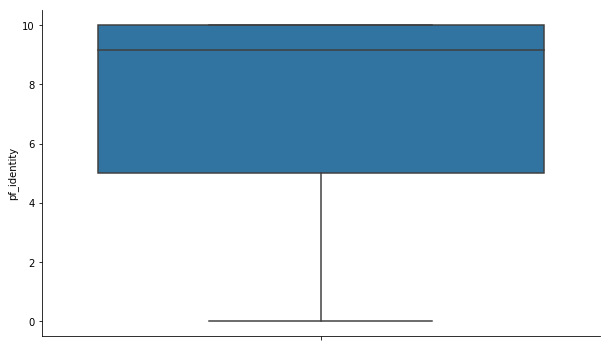

In [103]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='pf_identity')

seaborn.despine()

Por ultimo, el human freedom score

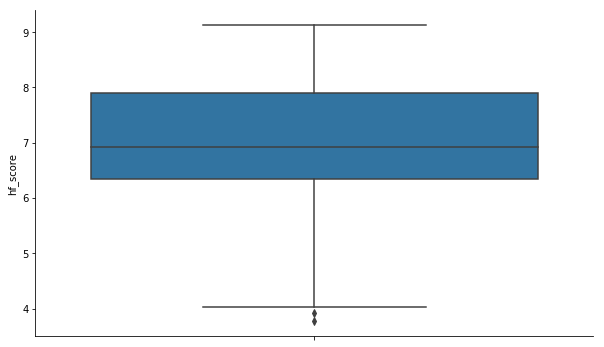

In [104]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='hf_score')

seaborn.despine()

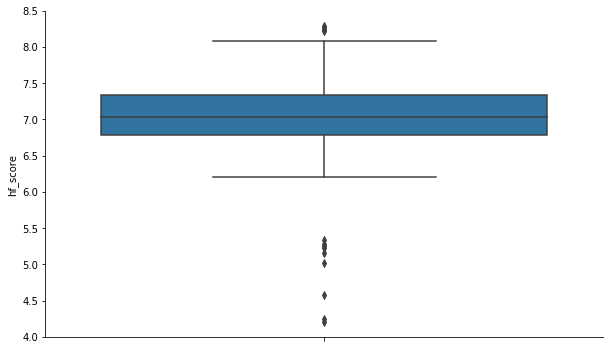

In [105]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'], y='hf_score')

seaborn.despine()

# Outliers Calculados por IQR

La siguiente funcion calcula los limites de outliers.

In [106]:
def detector_outliers(datos):
    
    datos_ordenados = numpy.copy(datos)
    datos_ordenados = sorted(datos_ordenados)
    
    q1 = numpy.percentile(datos_ordenados, 25)
    q3 = numpy.percentile(datos_ordenados, 75)
        
    iqr = q3 - q1
    
    borde_inferior = q1 - (1.5 * iqr)
    borde_superior = q3 + (1.5 * iqr)
    
    return borde_inferior, borde_superior


* PF_IDENTITY

Se calcula para valores de pf_identity en latinoamerica y el mundo:

In [107]:
limite_inf_lat, limite_sup_lat = detector_outliers(datos_latinoamerica['pf_identity'].dropna())
limite_inf_rm, limite_sup_rm = detector_outliers(dataset['pf_identity'].dropna())

print('Limites Latinoamerica')
print('Inferior = ', limite_inf_lat)
print('Superior = ', limite_sup_lat)

print()

print('Limites Resto Mundo')
print('Inferior = ', limite_inf_rm)
print('Superior = ', limite_sup_rm)

Limites Latinoamerica
Inferior =  3.75
Superior =  13.75

Limites Resto Mundo
Inferior =  -2.5
Superior =  17.5


In [108]:
print()
print('OUTLIERS LATINOAMERICA (Limite Inf)')
print(datos_latinoamerica[datos_latinoamerica['pf_identity'] < limite_inf_lat]['pf_identity'])
print()
print('OUTLIERS LATINOAMERICA (Limite Sup)')
print(datos_latinoamerica[datos_latinoamerica['pf_identity'] > limite_sup_lat]['pf_identity'])
print()
print('OUTLIERS MUNDO ENTERO (Limite Inf)')
print(dataset[dataset['pf_identity'] < limite_inf_rm]['pf_identity'])
print()
print('OUTLIERS MUNDO ENTERO (Limite Sup)')
print(dataset[dataset['pf_identity'] > limite_sup_rm]['pf_identity'])


OUTLIERS LATINOAMERICA (Limite Inf)
Series([], Name: pf_identity, dtype: float64)

OUTLIERS LATINOAMERICA (Limite Sup)
Series([], Name: pf_identity, dtype: float64)

OUTLIERS MUNDO ENTERO (Limite Inf)
Series([], Name: pf_identity, dtype: float64)

OUTLIERS MUNDO ENTERO (Limite Sup)
Series([], Name: pf_identity, dtype: float64)


***Para comparar con los resultados obtenidos, se adjuntan los boxplot de latinoamerica y el mundo para la variable pf_identity.***

## Box Plot pf_identity Mundo Entero

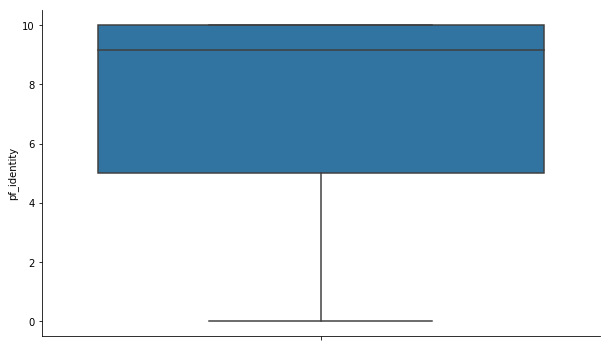

In [109]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='pf_identity')

seaborn.despine()

## Box Plot pf_identity latinoamerica¶

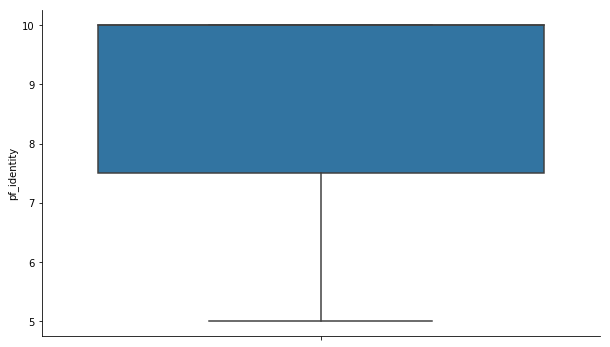

In [110]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=datos_latinoamerica, y='pf_identity')

seaborn.despine()

Como se observa en los boxplot, no hay outliers para el conjunto de datos de latinoamerica ni para el conjunto de datos del mundo entero.

***A continuacion se calculan los outliers para la variable hf_score y se los compara con los que otorga el boxplot (tanto para latinoamerica como para el mundo entero)***

* HF_SCORE

Se hace lo mismo con el human freedom score

In [111]:
limite_inf_lat, limite_sup_lat = detector_outliers(datos_latinoamerica['hf_score'].dropna())
limite_inf_rm, limite_sup_rm = detector_outliers(dataset['hf_score'].dropna())

print('Limites Latinoamerica')
print('Inferior = ', limite_inf_lat)
print('Superior = ', limite_sup_lat)

print()

print('Limites Resto Mundo')
print('Inferior = ', limite_inf_rm)
print('Superior = ', limite_sup_rm)

Limites Latinoamerica
Inferior =  5.938423924250003
Superior =  8.180790070249998

Limites Resto Mundo
Inferior =  3.9997211371249985
Superior =  10.231623494125001


In [112]:
print()
print('OUTLIERS LATINOAMERICA (Limite Inf)')
print(datos_latinoamerica[datos_latinoamerica['hf_score'] < limite_inf_lat]['hf_score'])
print()
print('OUTLIERS LATINOAMERICA (Limite Sup)')
print(datos_latinoamerica[datos_latinoamerica['hf_score'] > limite_sup_lat]['hf_score'])
print()
print('OUTLIERS MUNDO ENTERO (Limite Inf)')
print(dataset[dataset['hf_score'] < limite_inf_rm]['hf_score'])
print()
print('OUTLIERS MUNDO ENTERO (Limite Sup)')
print(dataset[dataset['hf_score'] > limite_sup_rm]['hf_score'])


OUTLIERS LATINOAMERICA (Limite Inf)
157     4.200724
319     4.241750
481     4.573730
643     5.013857
805     5.225650
967     5.332458
1129    5.156619
1291    5.283514
1453    5.257879
Name: hf_score, dtype: float64

OUTLIERS LATINOAMERICA (Limite Sup)
679     8.219911
841     8.290152
1003    8.271367
1165    8.249136
1327    8.227215
Name: hf_score, dtype: float64

OUTLIERS MUNDO ENTERO (Limite Inf)
141    3.765827
303    3.910826
Name: hf_score, dtype: float64

OUTLIERS MUNDO ENTERO (Limite Sup)
Series([], Name: hf_score, dtype: float64)


## BoxPlot hf_score Mundo Entero

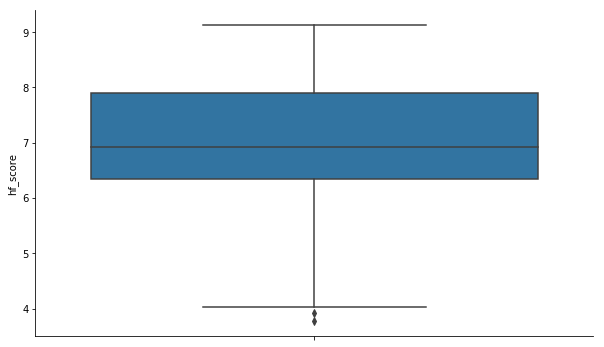

In [113]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='hf_score')

seaborn.despine()

## BoxPlot hf_score latinoamerica 

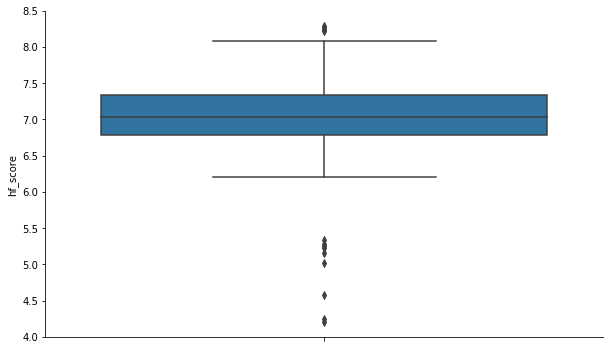

In [114]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=datos_latinoamerica, y='hf_score')

seaborn.despine()

***Nuevamente, se observa que los outliers obtenidos son iguales a los observados en los boxplot (para latinoamerica y el mundo entero).***

***Como conclusion, no sacariamos los outliers del conjunto mas chico (como latinoamerica) porque en un conjunto de datos mas grande que incluye a latinoamerica esos puntos no serian outliers. El conjunto de datos de latinoamerica, puede ser reducido pero aporta al total de puntos si analizamos todo el mundo.***

# 2. Agregacion de Datos

## 1. Media pf_identity, hf_score, ef_score a traves de los anios

Graficamos los barplots para pf_identity

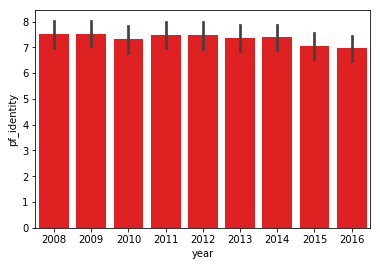

In [115]:
seaborn.barplot(data = dataset, x='year', y='pf_identity', color='RED')
plt.xlabel='Anio'
plt.ylabel='Personal Freedom - Identity'

Ahora calculamos la media de cada anio y luego la graficamos

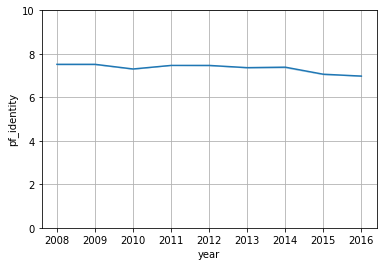

In [116]:
seaborn.lineplot(data = dataset, x='year', y='pf_identity', ci=0)
plt.xlabel='Anio'
plt.ylabel='Personal Freedom - Identity'
plt.ylim((0, 10))
plt.grid()

Hacemos los mismo con hf_score

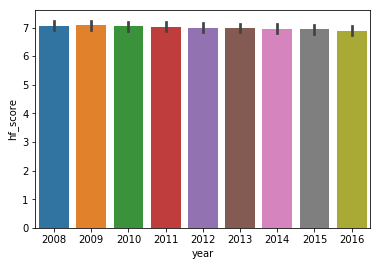

In [117]:
plt.xlabel='Anio'
plt.ylabel='Human Freedom - Score'
seaborn.barplot(data = dataset, x='year', y='hf_score')

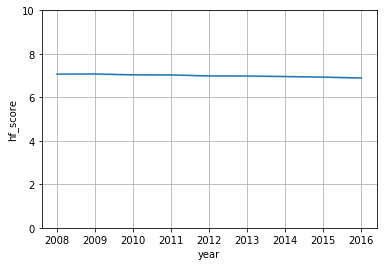

In [118]:
plt.xlabel='Anio'
plt.ylabel='Human Freedom - Score'
seaborn.lineplot(data = dataset, x='year', y='hf_score', ci=0)
plt.ylim((0, 10))
plt.grid()

Por ultimo, hacemos lo mismo con Economic Freedom Score

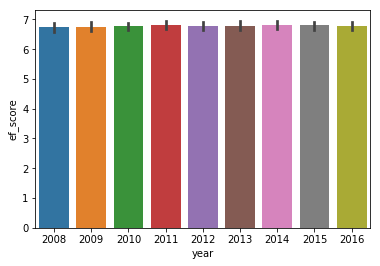

In [119]:
seaborn.barplot(data = dataset, x='year', y='ef_score')
plt.xlabel='Anio'
plt.ylabel='Economic Freedom - Score'
plt.show()

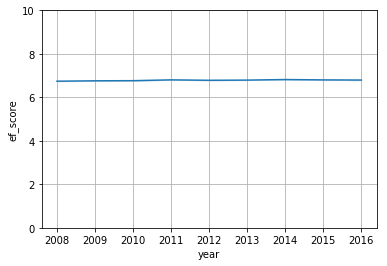

In [120]:
seaborn.lineplot(data = dataset, x='year', y='ef_score', ci=0)
plt.xlabel='Anio'
plt.ylabel='Economic Freedom - Score'
plt.ylim((0, 10))
plt.grid()

## 2. Variables diferenciadas por region

Empezamos con pf_identity

## PF Identity

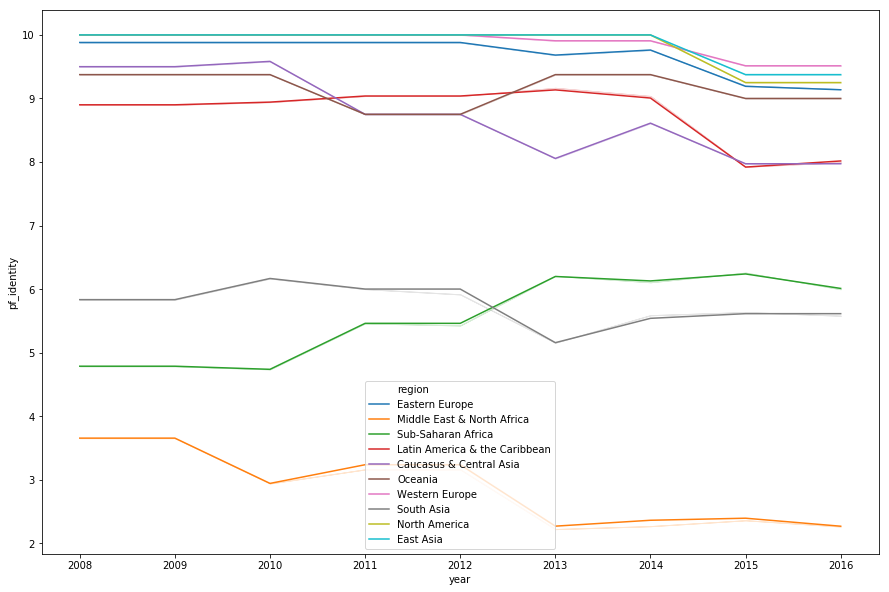

In [121]:
plt.figure(figsize=(15,10))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region', ci=0)

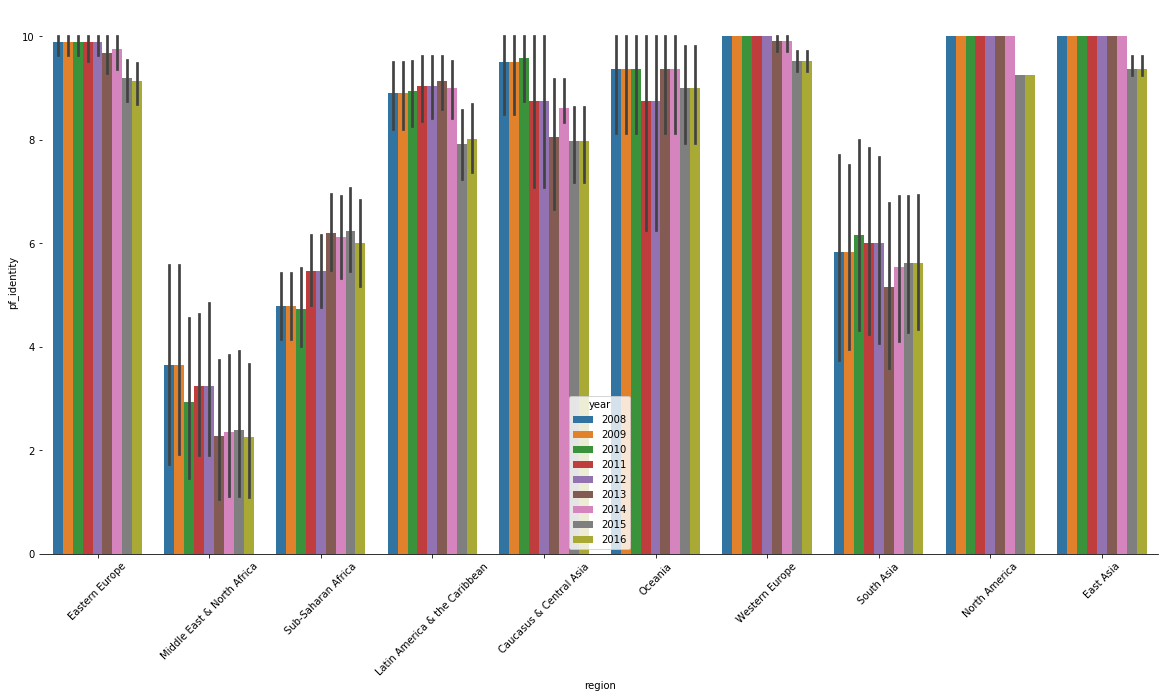

In [122]:
plt.figure(figsize=(20,10))
seaborn.barplot(data = dataset, x='region', y='pf_identity', hue = 'year')
plt.xlabel='Anio'
plt.ylabel='Personal Freedom - Identity'
plt.xticks(rotation=45)

seaborn.despine(left=True)

## HF_SCORE

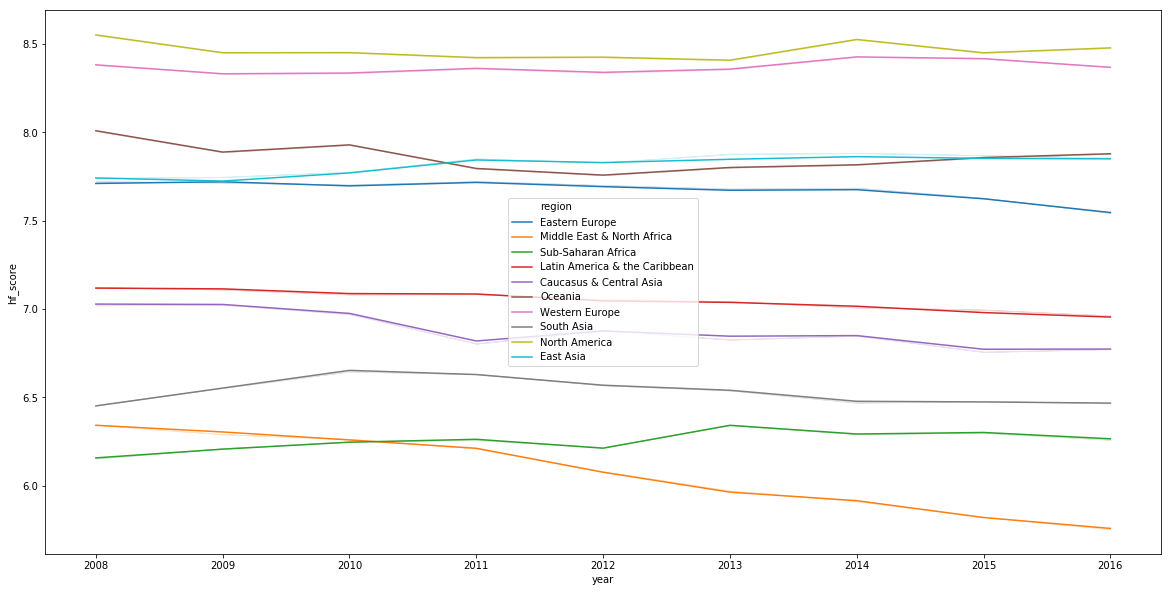

In [123]:
plt.figure(figsize=(20,10))
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region', ci=0)


Seguimos con Economic Freedom Score

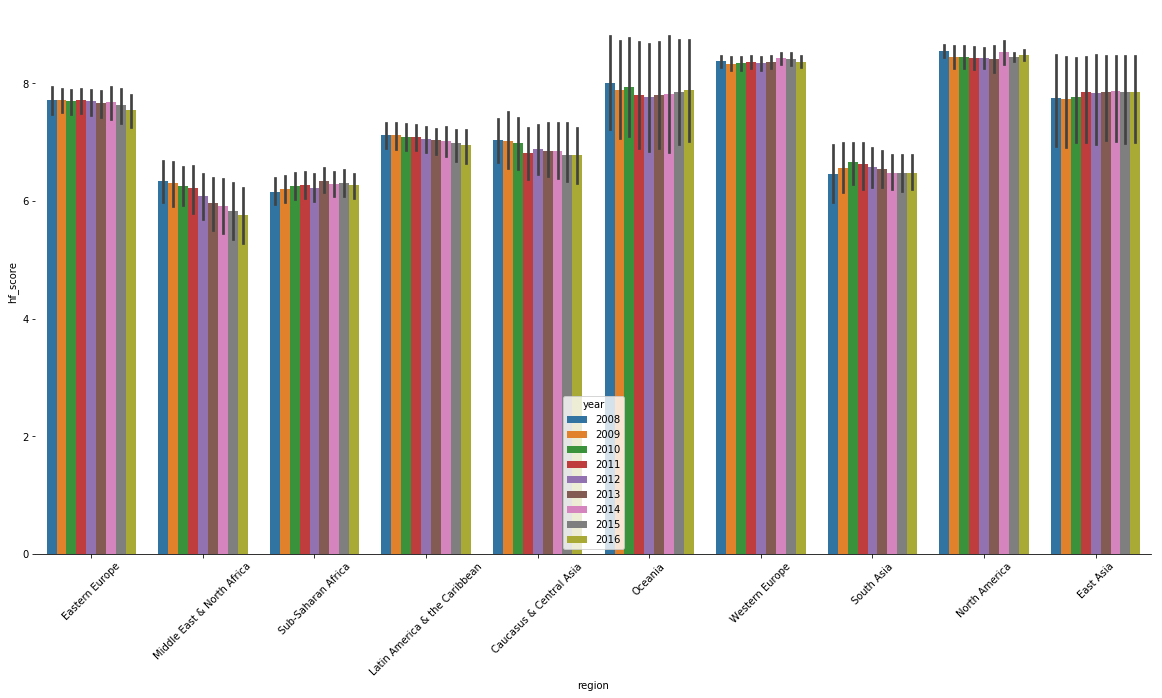

In [124]:
plt.figure(figsize=(20,10))
seaborn.barplot(data = dataset, x='region', y='hf_score', hue = 'year')
plt.xlabel='Anio'
plt.ylabel='Personal Freedom - Identity'
plt.xticks(rotation=45)

seaborn.despine(left=True)

## EF_SCORE

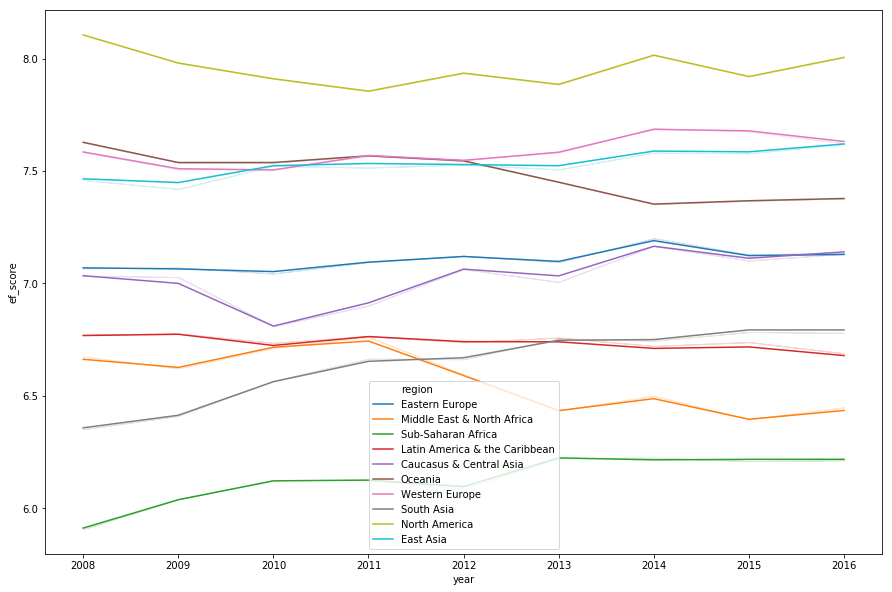

In [125]:
plt.figure(figsize=(15,10))
seaborn.lineplot(data=dataset, x='year', y='ef_score', hue='region', ci=0)

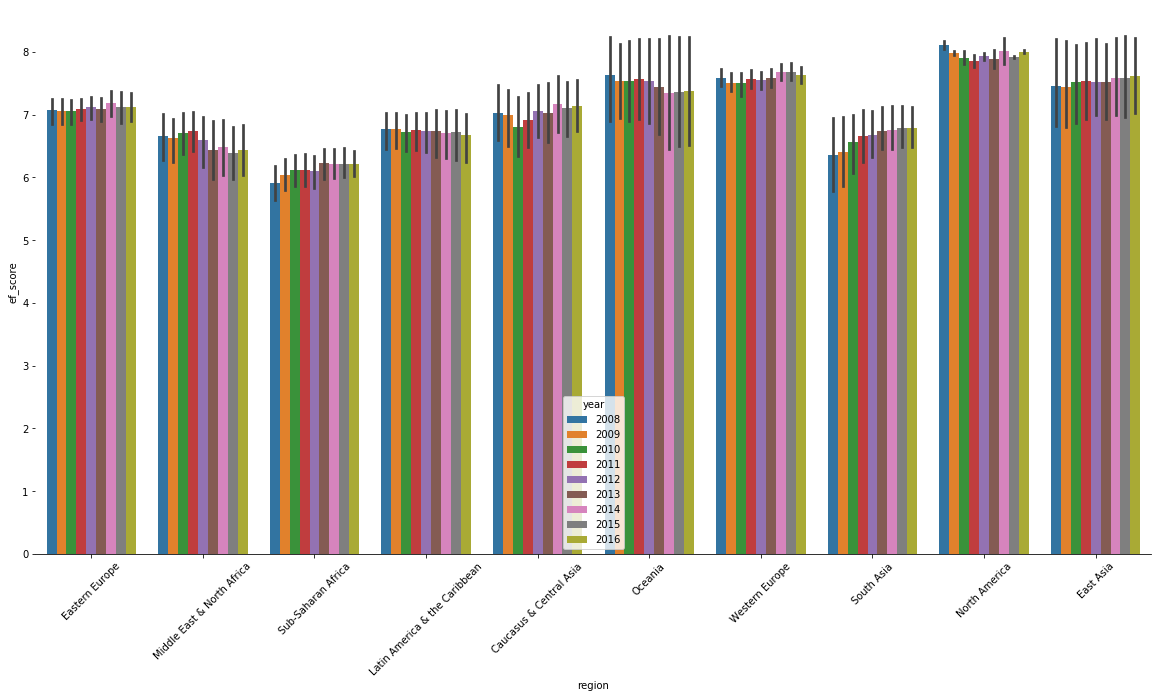

In [126]:
plt.figure(figsize=(20,10))
seaborn.barplot(data = dataset, x='region', y='ef_score', hue = 'year')
plt.xlabel='Anio'
plt.ylabel='Personal Freedom - Identity'
plt.xticks(rotation=45)

seaborn.despine(left=True)

***Ademas, agregamos los barplots que marcan la tendencia de las variables dividas por region***

## 3. Dividimos tendencias latinoamericanas por paises

A continuación se observan los países con pf_identity menor a 7 de latinoamérica.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

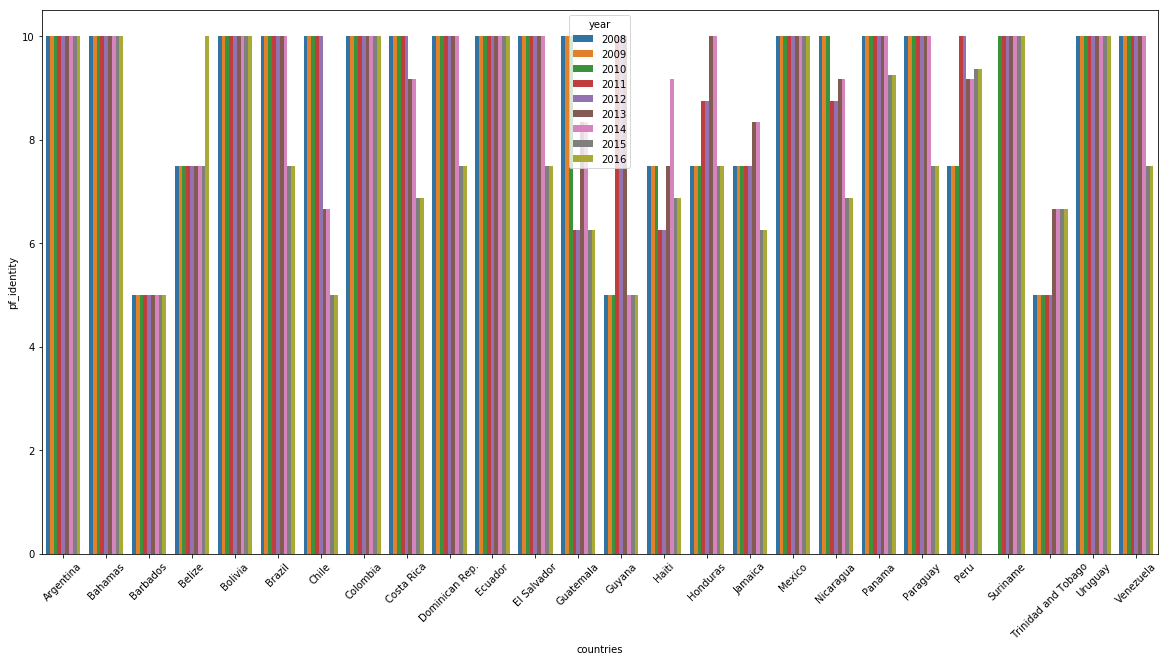

In [127]:
plt.figure(figsize=(20,10))
seaborn.barplot(data=datos_latinoamerica, x='countries', y='pf_identity', hue='year')
plt.xticks(rotation=45)

Cantidad de paises sin variacion:  9


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

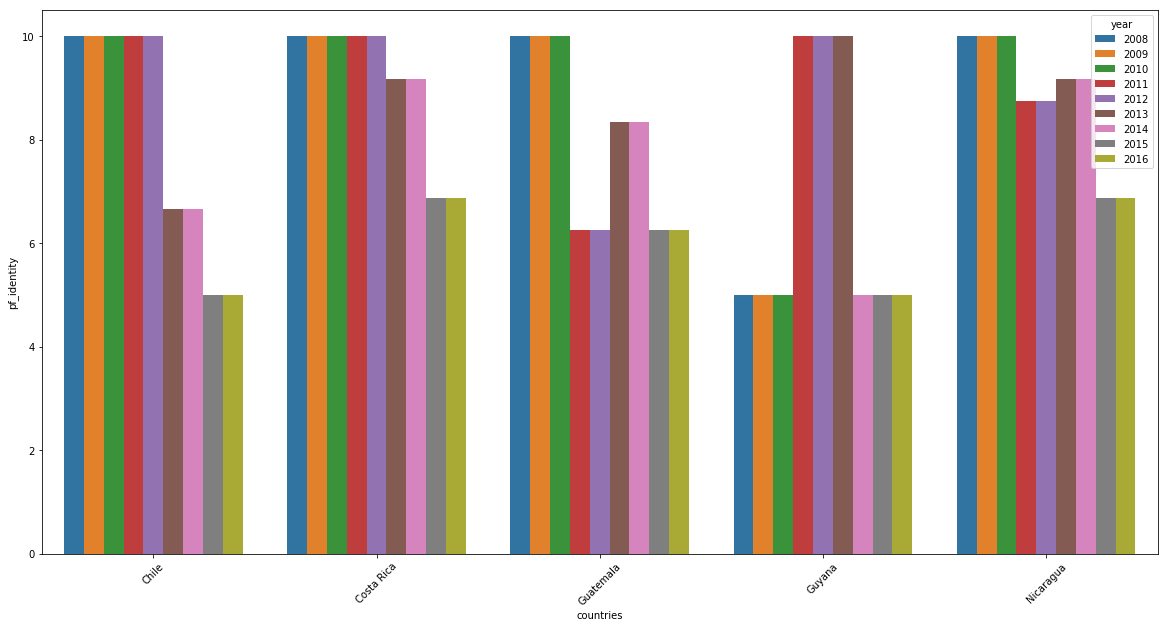

In [128]:
varianzas = [{'countries': var, 'varianza': datos_latinoamerica[datos_latinoamerica['countries'] == var]['pf_identity'].std()} for var in list(set(datos_latinoamerica['countries']))]
varianzas = sorted(varianzas, key=lambda k: k['varianza']) 

print('Cantidad de paises sin variacion: ',len([y for y in varianzas if y['varianza'] == 0]))

varianzas = [varianzas[i] for i in range(-1,-6,-1)]
varianzas


filtered_countries = [var['countries'] for var in varianzas] 
data = dataset[dataset['countries'].isin(filtered_countries)]

plt.figure(figsize=(20,10))
seaborn.barplot(data=data, x='countries', y='pf_identity', hue='year')
plt.xticks(rotation=45)

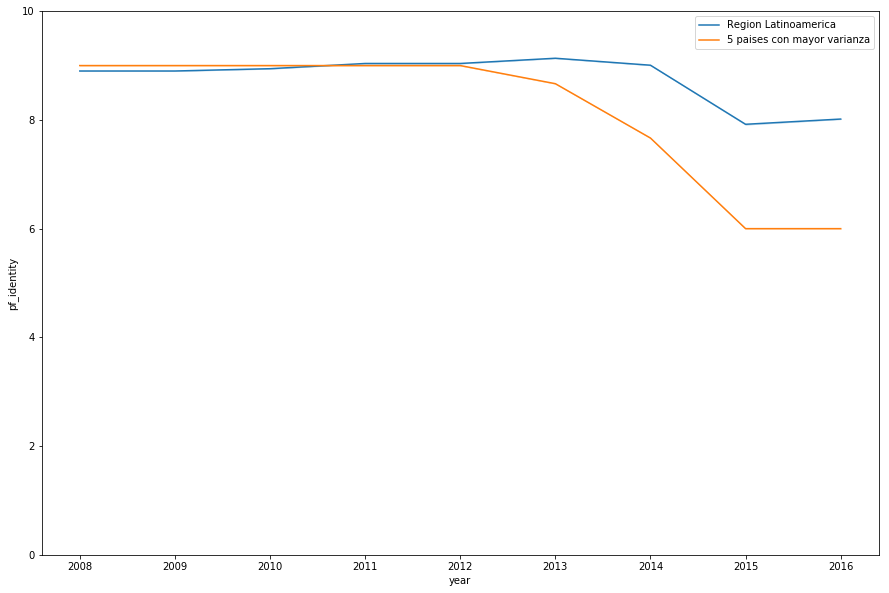

In [129]:
plt.figure(figsize=(15,10))
seaborn.lineplot(data=datos_latinoamerica, x='year', y='pf_identity',label = 'Region Latinoamerica', ci=0)
plt.ylim((0,10))

seaborn.lineplot(data=data, x='year', y='pf_identity', label='5 paises con mayor varianza',ci=0)
plt.legend()

Los paises se seleccionaron de acuerdo a el desvio estandar. Hay 9 paises que no varian, del resto seleccionamos los 5 de mayor desviacion estandar. 

# 3. Distribuciones

## 1. Personal Freedom Identity - Human Freedom Score - Economic Freedom Score

A continuación se observan los histogramas de las distribuciones del Personal Freedom Identity para latinoamérica y el mundo.

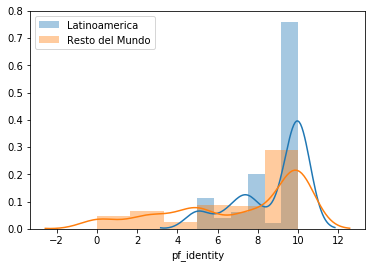

In [130]:
seaborn.distplot(datos_latinoamerica['pf_identity'].dropna(), bins = 6, label='Latinoamerica')
seaborn.distplot(datos_resto_mundo['pf_identity'].dropna(), bins = 6, label='Resto del Mundo')
plt.legend()

Siguen los datos de Human Freedom Score

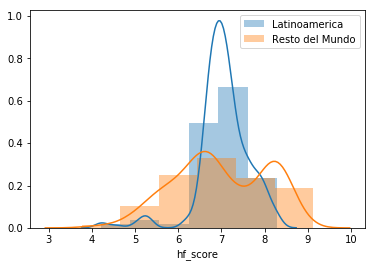

In [131]:
seaborn.distplot(datos_latinoamerica['hf_score'].dropna(), bins = 6, label='Latinoamerica')
seaborn.distplot(datos_resto_mundo['hf_score'].dropna(), bins = 6, label='Resto del Mundo')
plt.legend()

Ahora vemos los datos del Economic Freedom Score

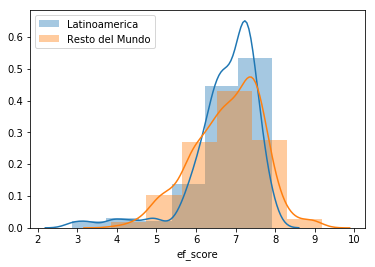

In [132]:
seaborn.distplot(datos_latinoamerica['ef_score'].dropna(), bins = 6, label='Latinoamerica')
seaborn.distplot(datos_resto_mundo['ef_score'].dropna(), bins = 6, label='Resto del Mundo')
plt.legend()

***Las distribuciones se aproximan a una normal***

Las distribuciones de latinoamerica para el pf_identity esta con un amplio sesgo a la derecha.

## 2. KSTEST

Para hacer el KSTEST tenemos que sacar un z-score, para comparar con la distribucion normal estandar. Empezamos con Latinoamerica con el pf_identity. ***En el caso del pf_identity no indica normalidad***.

KstestResult(statistic=0.35088781204626546, pvalue=4.8166522633069314e-26)


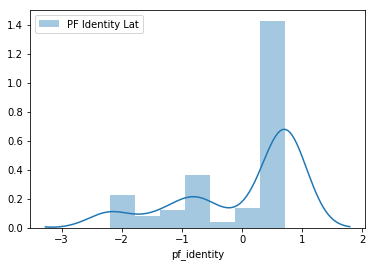

In [133]:
media_latinoamerica_pf = datos_latinoamerica['pf_identity'].dropna().mean()
desvio_latinoamerica_pf = datos_latinoamerica['pf_identity'].dropna().std()

seaborn.distplot((datos_latinoamerica['pf_identity'].dropna() - media_latinoamerica_pf)/desvio_latinoamerica_pf, bins = 7, label='PF Identity Lat')
print(stats.kstest(((datos_latinoamerica['pf_identity'].dropna()) - media_latinoamerica_pf)/desvio_latinoamerica_pf, 'norm'))

plt.legend()

Hacemos lo mismo con el Human Freedom Score. En este caso el test indica normalidad. ***El pvalue da 4.737935317389308e-05***

KstestResult(statistic=0.1504746027707088, pvalue=4.737935317381503e-05)


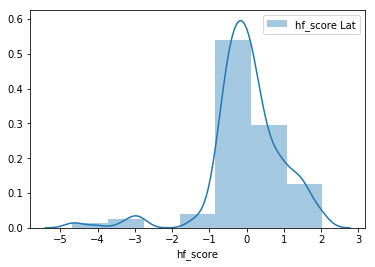

In [134]:
media_latinoamerica_hf = datos_latinoamerica['hf_score'].dropna().mean()
desvio_latinoamerica_hf = datos_latinoamerica['hf_score'].dropna().std()

seaborn.distplot((datos_latinoamerica['hf_score'].dropna() - media_latinoamerica_hf)/desvio_latinoamerica_hf, bins = 7, label = 'hf_score Lat')
print(stats.kstest(((datos_latinoamerica['hf_score'].dropna()) - media_latinoamerica_hf)/desvio_latinoamerica_hf, 'norm'))

plt.legend()

Ahora hacemos lo anterior con el Economic Freedom Score. En este caso, el test indica normalidad. ***El pvalue da 0.0017301088910812723***

KstestResult(statistic=0.1224228025540085, pvalue=0.001730108891081163)


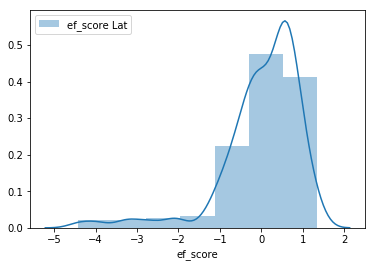

In [135]:
media_latinoamerica_ef = datos_latinoamerica['ef_score'].dropna().mean()
desvio_latinoamerica_ef = datos_latinoamerica['ef_score'].dropna().std()

seaborn.distplot((datos_latinoamerica['ef_score'].dropna() - media_latinoamerica_ef)/desvio_latinoamerica_ef, bins = 7, label = 'ef_score Lat')
print(stats.kstest(((datos_latinoamerica['ef_score'].dropna()) - media_latinoamerica_ef)/desvio_latinoamerica_ef, 'norm'))

plt.legend()

## 3. QQ Plots

En este caso, calculamos la media y desvio de nuestro dataset y luego hacemos un dataset aleatorio de una distro normal, utilizando muestra y desvio obtenidos sobre nuestros datos. Empezamos con pf_identity.

* PF IDENTITY

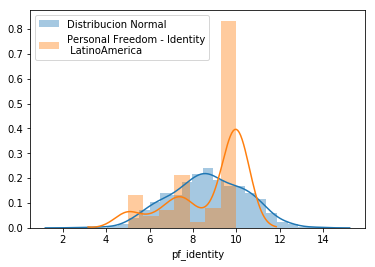

In [136]:
loc, scale = stats.norm.fit(datos_latinoamerica['pf_identity'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(datos_latinoamerica['pf_identity'].dropna(), label='Personal Freedom - Identity\n LatinoAmerica')

plt.legend()

A simple vista, la distro no parece normal. Dibujamos el QQ plot. ***Observamos que cerca del valor 10 se concentra el sesgo de la distro de nuestra muestra***.

In [137]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(datos_latinoamerica['pf_identity'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(datos_latinoamerica['pf_identity'].dropna())), percentiles)

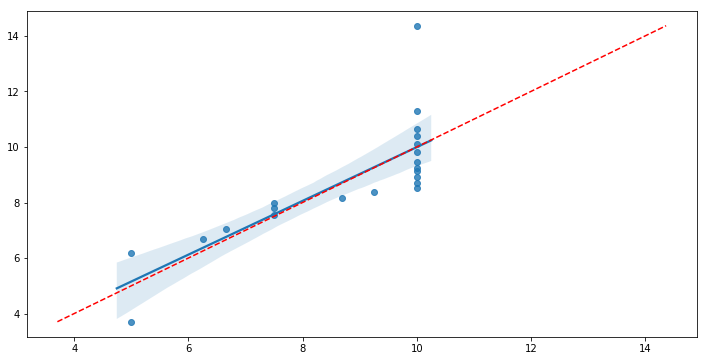

In [138]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel='Percentiles de la muestra de latinoamerica - pf_identity'
plt.ylabel='Percentiles de la distribución \n normal estimada'
plt.title='Gráfico QQ de la distribución de pf_identity en Latinoamerica y una distribución normal'

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

Hacemos lo mismo para el Human Freedom Score

* HF-SCORE

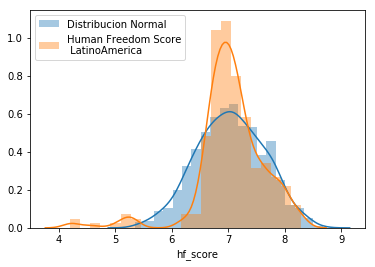

In [139]:
loc, scale = stats.norm.fit(datos_latinoamerica['hf_score'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(datos_latinoamerica['hf_score'].dropna(), label='Human Freedom Score\n LatinoAmerica')

plt.legend()

En este caso, las distribuciones de la muestra y la generada se parecen. Graficamos ahora el QQ-Plot. Observamos que los valores se aproximan a una normal y no hay zonas de concentracion.

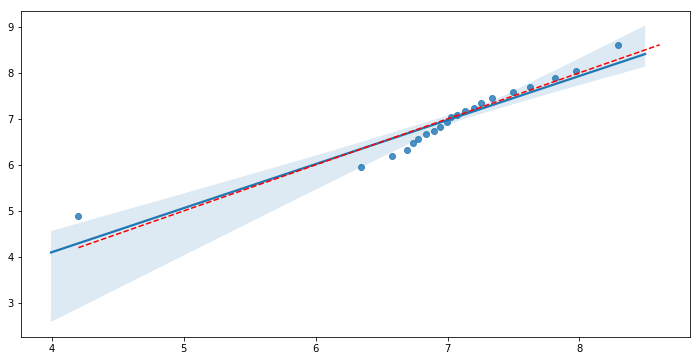

In [140]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(datos_latinoamerica['hf_score'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(datos_latinoamerica['hf_score'].dropna())), percentiles)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel='Percentiles de la muestra de latinoamerica - hf_score'
plt.ylabel='Percentiles de la distribución \n normal estimada'
plt.title='Gráfico QQ de la distribución de hf_score en Latinoamerica y una distribución normal'

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

A continuacion, los mismos calculos para el ef_score.

* EF_SCORE

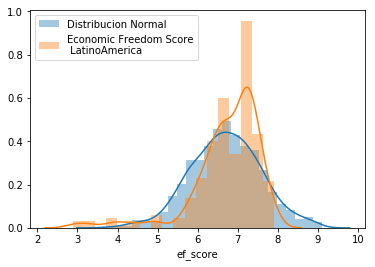

In [141]:
loc, scale = stats.norm.fit(datos_latinoamerica['ef_score'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(datos_latinoamerica['ef_score'].dropna(), label='Economic Freedom Score\n LatinoAmerica')

plt.legend()

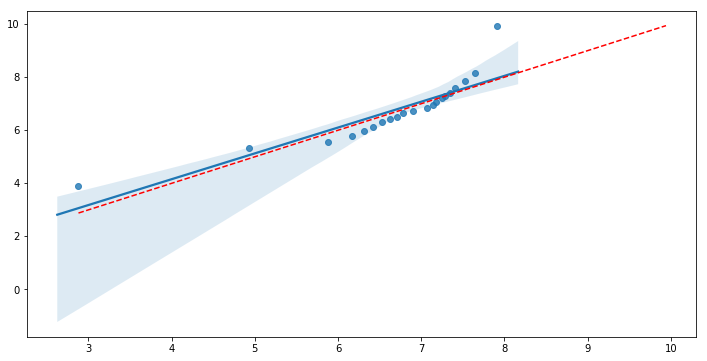

In [142]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(datos_latinoamerica['ef_score'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(datos_latinoamerica['ef_score'].dropna())), percentiles)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel='Percentiles de la muestra de latinoamerica - ef_score'
plt.ylabel='Percentiles de la distribución \n normal estimada'
plt.title='Gráfico QQ de la distribución de ef_score en Latinoamerica y una distribución normal'

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

***Los resultados condicen con los obtenidos en el KSTEST***. Las variables ef_score y hf_score parecen seguir distribuciones normales, no asi pf_identity.

## 4. Asimetria y Curtosis

In [143]:
def asimetria_fisher(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**3
    suma = numpy.sum(valor_menos_media)
        
    return suma/(len(muestra) * (desvio**3))

print('Asimetria Fisher para HF_SCORE = ', asimetria_fisher(datos_latinoamerica['hf_score'].dropna()))
print('Asimetria Fisher para EF_SCORE = ', asimetria_fisher(datos_latinoamerica['ef_score'].dropna()))
print('Asimetria Fisher para PF_IDENTITY = ', asimetria_fisher(datos_latinoamerica['pf_identity'].dropna()))

Asimetria Fisher para HF_SCORE =  -1.4327783341690914
Asimetria Fisher para EF_SCORE =  -1.9866044103738005
Asimetria Fisher para PF_IDENTITY =  -1.0410764737762728


Como se observa ***las tres distribuciones tienen coeficiente de fisher negativo, que justifica el sesgo que poseen hacia la derecha***

In [144]:
def curtosis(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**4
    suma = numpy.sum(valor_menos_media)
        
    return (suma/(len(muestra) * (desvio**4)))-3

print('Curtosis HF_SCORE = ', curtosis(datos_latinoamerica['hf_score'].dropna()))
print('Curtosis EF_SCORE = ', curtosis(datos_latinoamerica['ef_score'].dropna()))
print('Curtosis PF_IDENTITY = ', curtosis(datos_latinoamerica['pf_identity'].dropna()))

Curtosis HF_SCORE =  5.26844573498823
Curtosis EF_SCORE =  5.116427226258979
Curtosis PF_IDENTITY =  -0.31857094209372283


En el caso de hf_score y ef_score, los valores se concentran en la media, lo que implica una curtosis grande. No asi en el caso de pf_identity.

# 4. Correlaciones

## 1. Pairplot

Observamos el pairplot de las variables HF_SCORE, EF_SCORE y PF_IDENTITY. Se observa una correlacion positiva y una relacion entre HF_SCORE y EF_SCORE.

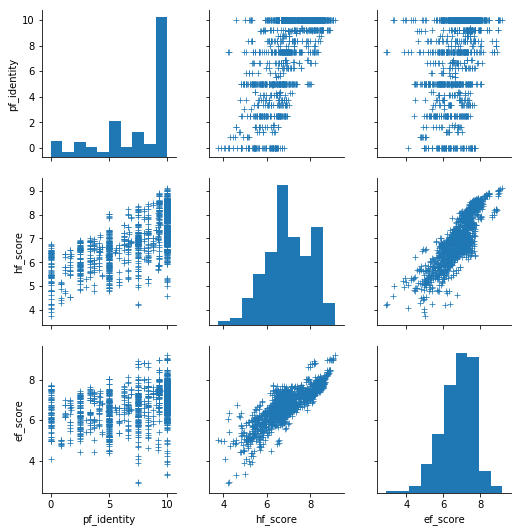

In [145]:
seaborn.pairplot(data=dataset, vars=['pf_identity', 'hf_score', 'ef_score'], markers='+')

## 2. Graficos de Correlacion

Graficamos correlacion entre pf_identity, hf_score y ef_score.

* PF-IDENTITY - HF-SCORE

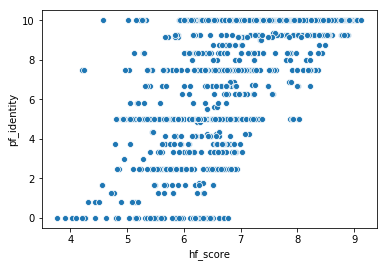

In [146]:
seaborn.scatterplot(data=dataset, x='hf_score', y='pf_identity')

* PF-IDENTITY - EF-SCORE

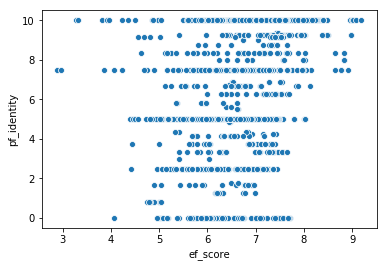

In [147]:
seaborn.scatterplot(data=dataset, x='ef_score', y='pf_identity')

* HF-SCORE - EF-SCORE

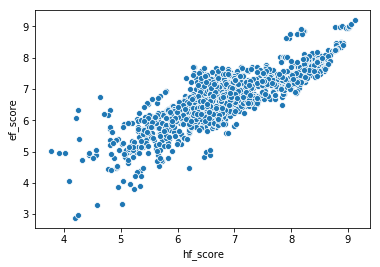

In [148]:
seaborn.scatterplot(data=dataset, x='hf_score', y='ef_score')

***Se observa claramente que hay una relacion entre ef_score y hf_score. No asi entre estas variables y pf_identity.***

## 3. Calculos de Covariancia y Coeficientes de Correlacion (Kendal, Spearman, Pearson)

A continuacion se calculan las covarianzas de las variables. Se realizan, en el primer script, con el metodo de numpy.cov y en el segundo con el algoritmo implementado (para comparar resultados).

In [149]:
datos1 = dataset['ef_score'].dropna()
datos2 = dataset['hf_score'].dropna()
datos3 = dataset['pf_identity'].dropna()

print('Covarianza Economic Freedom - Human Freedom = ', numpy.cov(datos1, datos2)[0][1])
print('Covarianza Economic Freedom - Personal Freedom = ',numpy.cov(datos1, datos3)[0][1])
print('Covarianza Human Freedom - Personal Freedom = ', numpy.cov(datos2, datos3)[0][1])

print('numero datos1 = ', len(datos1), ', numero datos2 = ', len(datos2), ', numero datos3 = ', len(datos3))

Covarianza Economic Freedom - Human Freedom =  0.7748561895051655
Covarianza Economic Freedom - Personal Freedom =  1.085633409943055
Covarianza Human Freedom - Personal Freedom =  2.196616473346225
numero datos1 =  1378 , numero datos2 =  1378 , numero datos3 =  1378


In [150]:
counter = 0.
sum1 = 0.
sum2 = 0.
sum3 = 0.

datos1 = dataset['ef_score']
datos2 = dataset['hf_score']
datos3 = dataset['pf_identity']

m1 = numpy.mean(datos1)
m2 = numpy.mean(datos2)
m3 = numpy.mean(datos3)

desv1 = numpy.std(datos1.dropna())
desv2 = numpy.std(datos2.dropna())
desv3 = numpy.std(datos3.dropna())

for d1, d2, d3 in zip(datos1, datos2, datos3):
    
    if((not numpy.isnan(d1)) and (not numpy.isnan(d2)) and (not numpy.isnan(d3))):
        sum1 = sum1 + ((d1 - m1) * (d2 - m2))
        sum2 = sum2 + ((d1 - m1) * (d3 - m3))
        sum3 = sum3 + ((d2 - m2) * (d3 - m3))
        #print(sum1, ' ', sum2, ' ', sum3)
        counter = counter + 1
        
covEfHf = sum1/counter
covEfPf = sum2/counter
covHfPf = sum3/counter

print()
print('Covarianza Economic Freedom - Human Freedom = ', covEfHf)
print('Covarianza Economic Freedom - Personal Freedom = ', covEfPf)
print('Covarianza Human Freedom - Personal Freedom = ',covHfPf)



Covarianza Economic Freedom - Human Freedom =  0.774293884578093
Covarianza Economic Freedom - Personal Freedom =  1.084845577279817
Covarianza Human Freedom - Personal Freedom =  2.1950224120448114


***Por un lado, observamos que los dos metodos dieron el mismo valor.*** 

***Si bien los 3 valores de correlacion dieron positivos, entre las unicas variables que existe una relacion aparente es entre hf_score y ef_score. Para corroborar la relacion lineal existente, vamos a analizar diferentes coeficientes.***

* Coeficiente de Pearson (exige que las ditros de las muestras sean normales)

El coeficiente fue implementado y calculado luego con la funcion de pandas para corroborar. 

In [151]:
pearsonEfHf = covEfHf/(desv1 * desv2)
print('Correlacion pearson, Ef-Hf = ', pearsonEfHf)

pearsonEfPf = covEfPf/(desv1 * desv3)
print('Correlacion pearson, Ef-Pf = ', pearsonEfPf)

pearsonHfPf = covHfPf/(desv2 * desv3)
print('Correlacion pearson, Hf-Pf = ', pearsonHfPf)

Correlacion pearson, Ef-Hf =  0.8548651479506566
Correlacion pearson, Ef-Pf =  0.38887723797145946
Correlacion pearson, Hf-Pf =  0.6777541950437723


In [152]:
print("PEARSON")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='pearson'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='pearson'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='pearson'))

PEARSON

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.854865
hf_score  0.854865  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.388877
pf_identity  0.388877     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.677754
pf_identity  0.677754     1.000000


In [153]:
print("SPEARMAN")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='spearman'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))

SPEARMAN

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.860647
hf_score  0.860647  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.426993
pf_identity  0.426993     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.686109
pf_identity  0.686109     1.000000


In [154]:
print("KENDALL -> Variables Ordinales")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='kendall'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

KENDALL -> Variables Ordinales

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.681062
hf_score  0.681062  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score      1.00000      0.30812
pf_identity   0.30812      1.00000

Hf - Pf
             hf_score  pf_identity
hf_score      1.00000      0.52131
pf_identity   0.52131      1.00000


***En los tres casos vemos que el economic freedom score y human freedom score dan un alto nivel de correlacion lineal***